In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('HRDataset.csv')

In [4]:
5df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


#### Deal with null values

In [6]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [8]:
# As null values in date of termination is valid, fill with 0
df.fillna('0', inplace=True)

In [10]:
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

## EDA

In [14]:
# Q. Top 10 employees with highest salaries
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [18]:
df.Salary.sort_values(ascending=False)

150    250000
308    220450
131    180000
96     178000
55     170500
        ...  
152     45433
176     45395
231     45115
140     45069
310     45046
Name: Salary, Length: 311, dtype: int64

In [26]:
pd.DataFrame(df.Salary.sort_values(ascending=False).head(10))

,Salary
150,250000
308,220450
131,180000
96,178000
55,170500
190,157000
240,150290
244,148999
243,140920
76,138888


### Find with specific attribute

In [28]:
df.PerformanceScore.unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [35]:
df[df.PerformanceScore == 'PIP']

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
67,"Delarge, Alex",10306,0,0,1,1,6,1,0,61568,...,John Smith,17.0,Indeed,PIP,1.93,3,0,1/30/2019,6,5
69,"Desimone, Carl",10310,1,1,1,1,5,1,0,53189,...,Amy Dunn,11.0,Indeed,PIP,1.12,2,0,1/31/2019,4,9
72,"Dietrich, Jenna",10304,0,0,0,1,6,1,0,59231,...,John Smith,17.0,Website,PIP,2.30,1,0,1/29/2019,2,17
83,"Erilus, Angela",10299,0,3,0,1,5,1,0,56847,...,Michael Albert,22.0,Indeed,PIP,3.00,1,0,2/25/2019,2,5
90,"Fernandes, Nilson",10308,1,1,1,1,5,1,0,64057,...,Amy Dunn,11.0,Indeed,PIP,1.56,5,0,1/3/2019,6,15
91,"Fett, Boba",10309,0,0,1,1,3,1,0,53366,...,Peter Monroe,7.0,LinkedIn,PIP,1.20,3,6,2/4/2019,3,2
95,"Forrest, Alex",10305,1,1,1,1,6,3,0,70187,...,Lynn Daneault,21.0,Employee Referral,PIP,2.00,5,0,1/28/2019,4,7
112,"Gonzalez, Juan",10300,1,1,1,5,5,1,1,68898,...,Brannon Miller,12.0,Diversity Job Fair,PIP,3.00,3,0,3/6/2011,3,10
188,"Miller, Ned",10298,0,0,1,5,5,1,0,55800,...,Brannon Miller,12.0,LinkedIn,PIP,3.00,2,0,1/14/2013,6,6
205,"O'hare, Lynn",10303,0,0,0,4,5,1,0,52674,...,Kissy Sullivan,20.0,LinkedIn,PIP,2.33,2,0,3/9/2018,6,3


In [37]:
len(df[df.PerformanceScore == 'PIP'])

13

### How many people taking how many leaves

In [47]:
pd.DataFrame(df.Absences.value_counts(normalize=True)*100)

,proportion
Absences,
4,7.395498
16,7.395498
7,6.752412
2,6.752412
15,6.430868
13,5.466238
14,5.466238
3,5.144695
19,5.144695


### Whether employees are maried or not

In [49]:
df['MarriedID'].value_counts()

MarriedID
0    187
1    124
Name: count, dtype: int64

### Special project count (Imp person in company)

In [54]:
pd.DataFrame(df['SpecialProjectsCount'].value_counts())

,count
SpecialProjectsCount,
0,241
6,21
5,21
7,12
4,9
3,3
8,2
2,1
1,1


In [59]:
df[df['SpecialProjectsCount'] != 0]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16
12,"Barbossa, Hector",10012,0,2,1,1,3,4,1,92328,...,Simon Roup,4.0,Diversity Job Fair,Exceeds,4.28,4,5,2/25/2019,0,9
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,1/15/2015,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,"Voldemort, Lord",10118,1,1,1,4,3,3,0,113999,...,Simon Roup,4.0,Employee Referral,Fully Meets,4.33,3,7,2/15/2017,0,9
298,"Wang, Charlie",10172,0,0,1,1,3,3,0,84903,...,Brian Champaigne,13.0,Indeed,Fully Meets,3.42,4,7,1/4/2019,0,17
299,"Warfield, Sarah",10127,0,4,0,1,3,3,0,107226,...,Peter Monroe,7.0,Employee Referral,Fully Meets,4.20,4,8,2/5/2019,0,7
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


In [65]:
pd.DataFrame(df['SpecialProjectsCount'].sort_values(ascending=False))

,SpecialProjectsCount
61,8
299,8
243,7
254,7
25,7
...,...
126,0
127,0
128,0
129,0


## Visualization

In [72]:
# highest v/s lowest salaries
df['Salary'].sort_values(ascending=False).head(10)

150    250000
308    220450
131    180000
96     178000
55     170500
190    157000
240    150290
244    148999
243    140920
76     138888
Name: Salary, dtype: int64

In [71]:
df['Salary'].sort_values(ascending=False).tail(10)

226    46430
247    46428
74     46335
159    46120
216    45998
152    45433
176    45395
231    45115
140    45069
310    45046
Name: Salary, dtype: int64

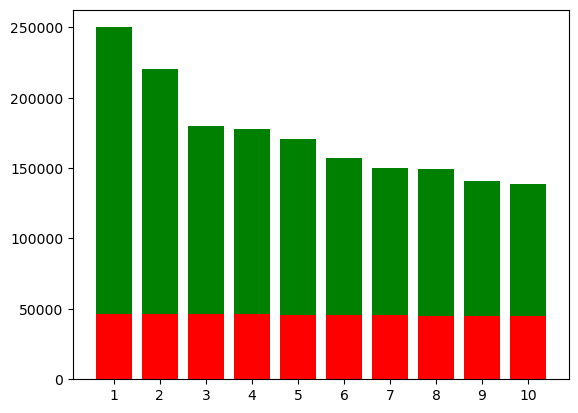

In [87]:
c = [1,2,3,4,5,6,7,8,9,10]
y1 = df.Salary.sort_values(ascending=False).head(10)
y2 = df.Salary.sort_values(ascending=False).tail(10)

plt.bar(c, y1, color = 'g', label = 'highest')
plt.bar(c, y2, color = 'r', label = 'lowest')

plt.xticks(c)
plt.show()

### Recruitment source

In [89]:
df.RecruitmentSource.unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [93]:
l = df.RecruitmentSource.value_counts()

<BarContainer object of 9 artists>

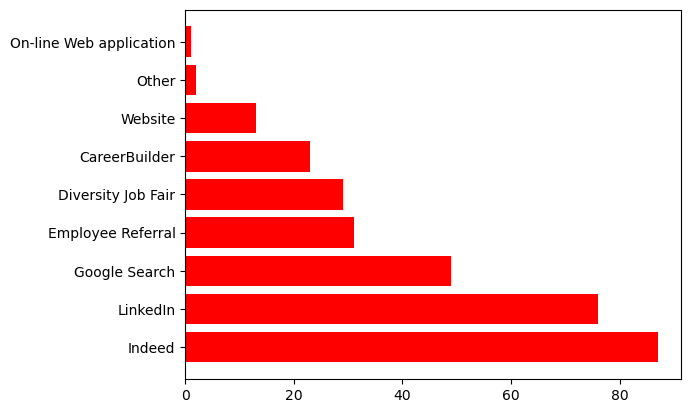

In [95]:
plt.barh(l.index, l, color='r')

### Line plot

<Axes: xlabel='PerformanceScore', ylabel='count'>

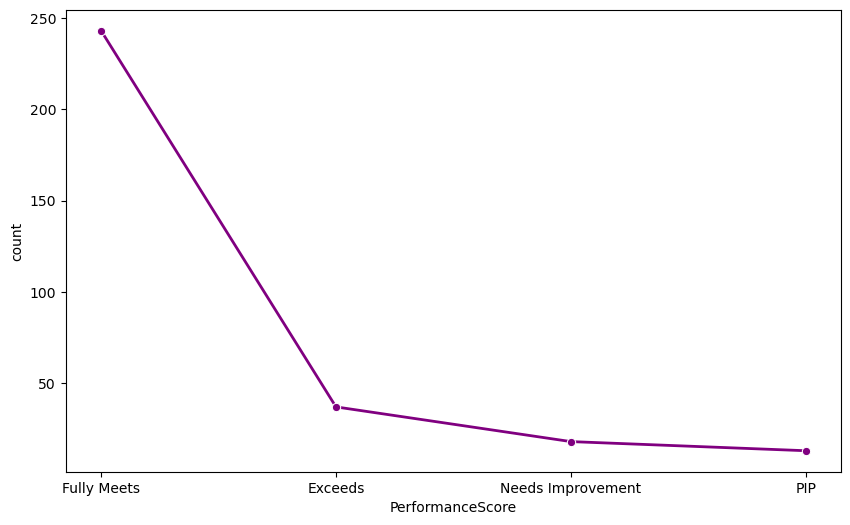

In [96]:
z = df.PerformanceScore.value_counts()
plt.figure(figsize = (10,6))
sns.lineplot(data=z, marker='o', color='purple', linewidth=2)

### Stem plot

In [108]:
z = df.EmpSatisfaction.value_counts()

<StemContainer object of 3 artists>

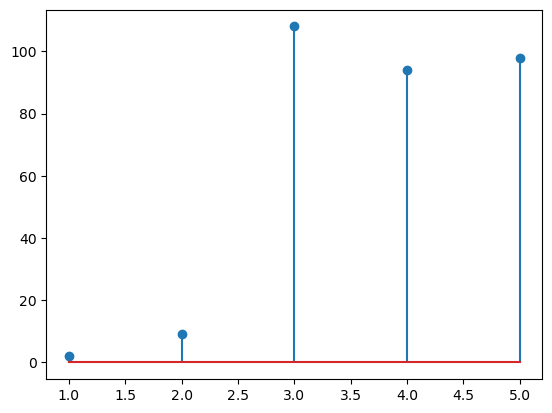

In [110]:
plt.stem(z.index, z)

### Outliers

<Axes: xlabel='Department', ylabel='Salary'>

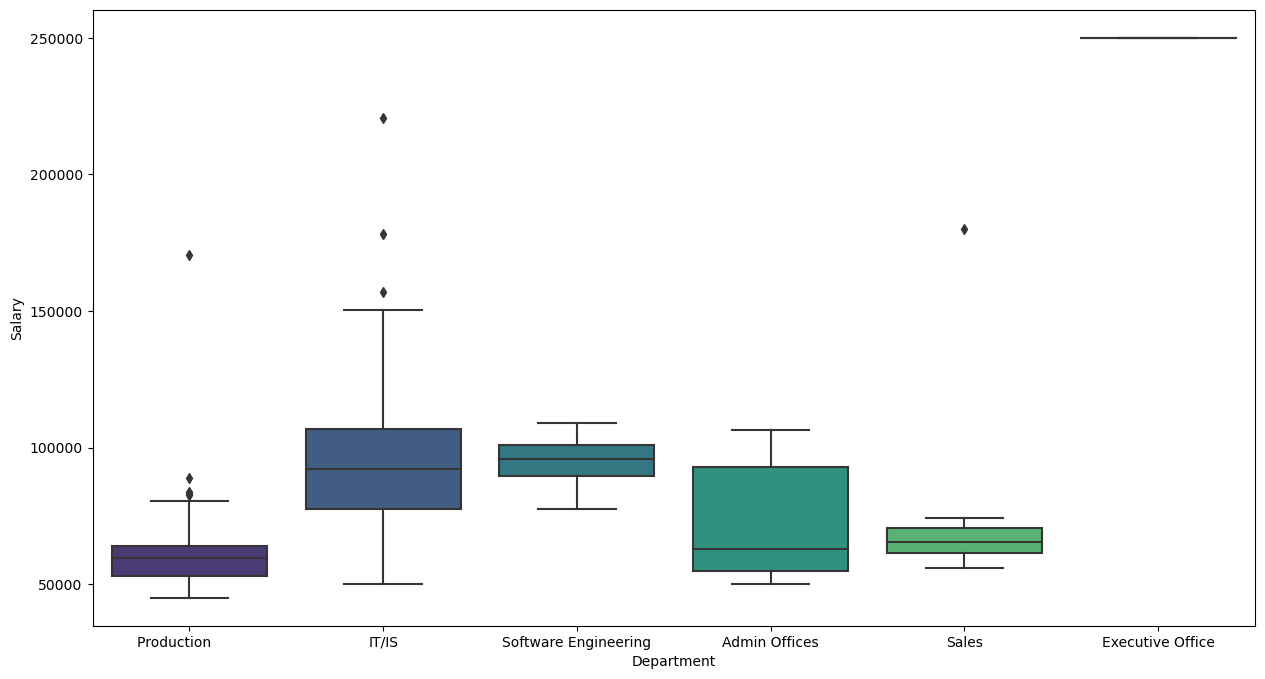

In [111]:
plt.figure(figsize=(15,8))

sns.boxplot(x='Department', y='Salary', data=df, palette='viridis')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Production Technician I'),
  Text(1, 0, 'Sr. DBA'),
  Text(2, 0, 'Production Technician II'),
  Text(3, 0, 'Software Engineer'),
  Text(4, 0, 'IT Support'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Database Administrator'),
  Text(7, 0, 'Enterprise Architect'),
  Text(8, 0, 'Sr. Accountant'),
  Text(9, 0, 'Production Manager'),
  Text(10, 0, 'Accountant I'),
  Text(11, 0, 'Area Sales Manager'),
  Text(12, 0, 'Software Engineering Manager'),
  Text(13, 0, 'BI Director'),
  Text(14, 0, 'Director of Operations'),
  Text(15, 0, 'Sr. Network Engineer'),
  Text(16, 0, 'Sales Manager'),
  Text(17, 0, 'BI Developer'),
  Text(18, 0, 'IT Manager - Support'),
  Text(19, 0, 'Network Engineer'),
  Text(20, 0, 'IT Director'),
  Text(21, 0, 'Director of Sales'),
  Text(22, 0, 'Administrative Assistant'),
  Text(23, 0, 'President & CEO'),
  

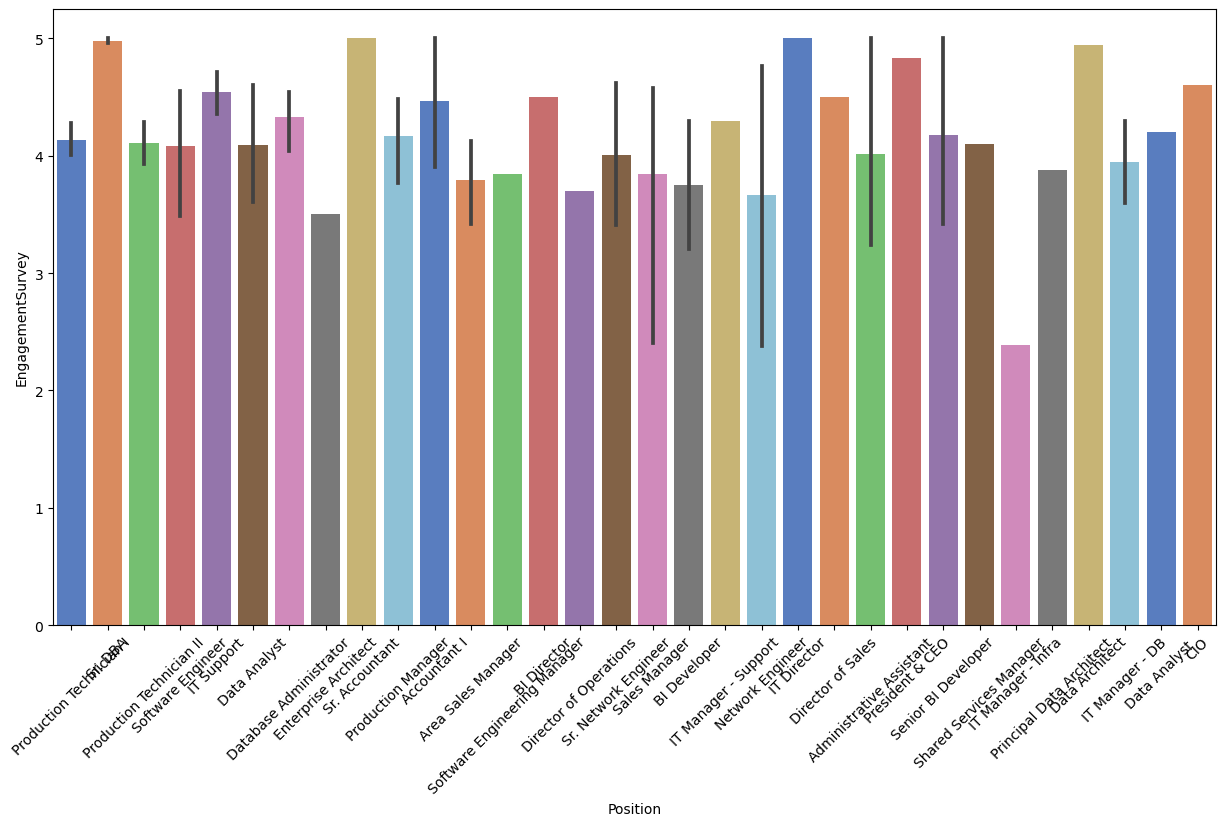

In [115]:
plt.figure(figsize=(15,8))
sns.barplot(x='Position',y='EngagementSurvey', data=df, palette='muted')
plt.xticks(rotation=45)